## DSTEP20 // Open Data Delaware: Delaware Natural Areas
<small> January 13, 2020 </small>

This notebook will **visualize the location of the Delaware Natural Areas** from Open Data Delaware.  The data can be found [here](https://data.delaware.gov/Energy-and-Environment/Delaware-Natural-Areas/9be9-z9z2).

---

First import numpy and pandas

In [0]:
import numpy as np
import pandas as pd

Now load the data (getting the csv link from the "export" tab on the data page).

In [0]:
# -- set the file name
fname = "https://data.delaware.gov/api/views/9be9-z9z2/rows.csv?accessType=DOWNLOAD"

# -- load the data
natarea = pd.read_csv(fname)

We should always look at the data first,

In [12]:
# -- print the dataframe
print(natarea.head())

   OBJECTID                              NAME  ...    SHAPE.AREA SHAPE.LEN
0       203          Angola Neck Natural Area  ...  7.573356e+06       NaN
1       204  Appoquinimink River Natural Area  ...  3.992140e+07       NaN
2       205      Augustine Creek Natural Area  ...  1.062277e+07       NaN
3       206    Beach Plum Island Natural Area  ...  7.847397e+05       NaN
4       207       Bellevue Woods Natural Area  ...  2.344309e+05       NaN

[5 rows x 6 columns]


Let's change the maximum nuber of displayed columns to see the full DataFrame and reprint

In [0]:
# -- change max number of displayed columns
pd.set_option('display.max_columns', 500)

In [19]:
# -- reprint the data
print(natarea.head())

   OBJECTID                              NAME        ACRES  \
0       203          Angola Neck Natural Area  1139.266025   
1       204  Appoquinimink River Natural Area  5873.748800   
2       205      Augustine Creek Natural Area  1560.761243   
3       206    Beach Plum Island Natural Area   117.609997   
4       207       Bellevue Woods Natural Area    34.166859   

                                      SHAPE    SHAPE.AREA  SHAPE.LEN  
0   (38.67858192700004, -75.14798681899998)  7.573356e+06        NaN  
1  (39.448292038000034, -75.58615071999998)  3.992140e+07        NaN  
2   (39.49799734900006, -75.61513617699995)  1.062277e+07        NaN  
3   (38.79570913900005, -75.17049252299995)  7.847397e+05        NaN  
4   (39.78198187900006, -75.49593646799997)  2.344309e+05        NaN  


And let's look at the data types

In [15]:
# -- print the column data types
print(natarea.dtypes)

OBJECTID        int64
NAME           object
ACRES         float64
SHAPE          object
SHAPE.AREA    float64
SHAPE.LEN     float64
dtype: object


In order to visualize the location of these areas, we'll have to deal with the SHAPE column.  But notice this complication:

In [20]:
# -- print the type of the elements of the SHAPE column
print(natarea["SHAPE"].iloc[0])
print(type(natarea["SHAPE"].iloc[0]))

(38.67858192700004, -75.14798681899998)
<class 'str'>


## **A Brief Aside on <i>"string manipulations"</i>**

In [0]:
mystr = "Hello, how are you?"

In [24]:
# -- split the string by the comma
spl = mystr.split(",")

print(spl)

['Hello', ' how are you?']


In [27]:
print(mystr[5])

,


notice the space is still there in front of the word "how"

In [30]:
# -- split the string by the comma and space
spl = mystr.split(", ")

print(spl)

['Hello', 'how are you?']


Remove the question mark

In [31]:
# -- split the string by comma and space and remove the question mark from the 
#    second element of the result
spl = mystr.split(", ")
hay = spl[1].replace("?", "")

print(hay)

how are you


In [32]:
# -- check the effect on spl
print(spl)

['Hello', 'how are you?']


In [33]:
# -- modify spl to remove the question mark
spl[1] = spl[1].replace("?", "")

print(spl)

['Hello', 'how are you']


another useful function modifies capitalization

In [34]:
# -- print lowercase of first clause, upper case of second clause
print(spl[0].lower())
print(spl[1].upper())

hello
HOW ARE YOU


What if I wanted to remove spaces from spl[1]?

In [35]:
# -- remove the spaces from the first element of spl
print(spl[1].replace(" ", ""))

howareyou


What if I wanted to split spl[1] into its three words?

In [36]:
# -- split spl[1] into three words by splitting on spaces
print(spl[1].split(" "))

['how', 'are', 'you']


Finally, a particularly useful method is the "join" method

In [39]:
sep = "5"
words = ["Dobler", "Gregory", "Biden School"]
csv = sep.join(words)

print("here is the list: {0}".format(words))
print("here is the list of words joined with a comma: {0}".format(csv))

here is the list: ['Dobler', 'Gregory', 'Biden School']
here is the list of words joined with a comma: Dobler5Gregory5Biden School


---

## **Working with strings in DataFrames**

As we saw above, the SHAPE column in the data frame is a string.  It is a string containing the the latitude and longitude of the Natrual Area.  It would be nice to put the locations of these on a map.  To do that, we need a separate column for latitude and longitude.  I.e., we'd like to first pull out the latitude and longitude for each string and put it in its own column.

We can do that with string manipulations that act on a whole column:

In [43]:
# -- remove the ( from the SHAPE column
natarea["SHAPE"] = natarea["SHAPE"].str.replace("(", "")

print(natarea["SHAPE"])

0      38.67858192700004, -75.14798681899998)
1     39.448292038000034, -75.58615071999998)
2      39.49799734900006, -75.61513617699995)
3      38.79570913900005, -75.17049252299995)
4      39.78198187900006, -75.49593646799997)
                       ...                   
62    38.821460595000076, -75.54098959399994)
63    39.659468152000045, -75.74408198599997)
64     38.54991600400007, -75.19876082799993)
65     39.75255548600006, -75.74651151999996)
66    39.364763921000076, -75.51051395299999)
Name: SHAPE, Length: 67, dtype: object


In [44]:
# -- remove the ) from the SHAPE column
natarea["SHAPE"] = natarea["SHAPE"].str.replace(")", "")

print(natarea["SHAPE"])

0      38.67858192700004, -75.14798681899998
1     39.448292038000034, -75.58615071999998
2      39.49799734900006, -75.61513617699995
3      38.79570913900005, -75.17049252299995
4      39.78198187900006, -75.49593646799997
                       ...                  
62    38.821460595000076, -75.54098959399994
63    39.659468152000045, -75.74408198599997
64     38.54991600400007, -75.19876082799993
65     39.75255548600006, -75.74651151999996
66    39.364763921000076, -75.51051395299999
Name: SHAPE, Length: 67, dtype: object


So now, "SHAPE" has the paranthases removed, but we need to split the latitude and longitude apart.  But note what the output is when we split the values in a column:

In [45]:
print(natarea["SHAPE"].str.split(", "))

0      [38.67858192700004, -75.14798681899998]
1     [39.448292038000034, -75.58615071999998]
2      [39.49799734900006, -75.61513617699995]
3      [38.79570913900005, -75.17049252299995]
4      [39.78198187900006, -75.49593646799997]
                        ...                   
62    [38.821460595000076, -75.54098959399994]
63    [39.659468152000045, -75.74408198599997]
64     [38.54991600400007, -75.19876082799993]
65     [39.75255548600006, -75.74651151999996]
66    [39.364763921000076, -75.51051395299999]
Name: SHAPE, Length: 67, dtype: object


Each entry is now a **list** of strings:

In [0]:
# -- overwrite the values in SHAPE with the split values
natarea["SHAPE"] = natarea["SHAPE"].str.split(", ")

In [47]:
print(natarea)

    OBJECTID                                         NAME        ACRES  \
0        203                     Angola Neck Natural Area  1139.266025   
1        204             Appoquinimink River Natural Area  5873.748800   
2        205                 Augustine Creek Natural Area  1560.761243   
3        206               Beach Plum Island Natural Area   117.609997   
4        207                  Bellevue Woods Natural Area    34.166859   
..       ...                                          ...          ...   
62       265                 Toms Dam Branch Natural Area  1276.538408   
63       266  University of Delaware Woodlot Natural Area    39.173797   
64       267                     Vines Creek Natural Area   818.709087   
65       268         White Clay Creek Valley Natural Area  2832.223268   
66       269                  Woodland Beach Natural Area  4759.508315   

                                       SHAPE    SHAPE.AREA  SHAPE.LEN  
0    [38.67858192700004, -75.1479868189

In [51]:
# -- print the first row of the shape column with iloc
print(natarea["SHAPE"].iloc[0] )

['38.67858192700004', '-75.14798681899998']


As of right now$^*$ there doesn't seem to be a single function for "exploding" the elements of lists in a column into separate columns.

But, what we *can* do is create a temporary DataFrame and put its columns back into the original DataFrame:

<small><i> $^*$ though pandas is being updated all the time, so perhaps in the future... </i></small>

In [54]:
# -- create the list of list of lat, lon using the to_list function
ll_list = natarea["SHAPE"].to_list()

print(ll_list)

[['38.67858192700004', '-75.14798681899998'], ['39.448292038000034', '-75.58615071999998'], ['39.49799734900006', '-75.61513617699995'], ['38.79570913900005', '-75.17049252299995'], ['39.78198187900006', '-75.49593646799997'], ['39.41678847500003', '-75.56784914199994'], ['38.578309036000064', '-75.16133446199996'], ['39.182795843000065', '-75.73477278199994'], ['39.23782764600003', '-75.46416508499993'], ['39.82183253900007', '-75.55980428199996'], ['38.74149194300003', '-75.32886911099996'], ['39.55304294100006', '-75.62929822799998'], ['39.54602857100008', '-75.71442977999999'], ['39.54717104200006', '-75.69658622099996'], ['38.78504228700007', '-75.08738635099996'], ['38.932287373000065', '-75.32521096199997'], ['39.40286369100005', '-75.58119909099997'], ['39.65458020600005', '-75.77098700799996'], ['39.01925584900005', '-75.66311402999997'], ['39.62767893100005', '-75.72586052399998'], ['39.70346733900004', '-75.65492492699997'], ['38.621233000000075', '-75.30674171299995'], ['39

In [0]:
# -- put that list into a temporary dataframe
temp = pd.DataFrame(ll_list, columns=["lat", "lon"])

In [60]:
print(temp)

                   lat                 lon
0    38.67858192700004  -75.14798681899998
1   39.448292038000034  -75.58615071999998
2    39.49799734900006  -75.61513617699995
3    38.79570913900005  -75.17049252299995
4    39.78198187900006  -75.49593646799997
..                 ...                 ...
62  38.821460595000076  -75.54098959399994
63  39.659468152000045  -75.74408198599997
64   38.54991600400007  -75.19876082799993
65   39.75255548600006  -75.74651151999996
66  39.364763921000076  -75.51051395299999

[67 rows x 2 columns]


Now we can put these values back into the original DataFrame (converting them from strings to float as we do so):

In [64]:
# -- put the values of the temporary dataframe back into the original data frame
#    and convert to float
natarea["lat"] = temp["lat"].astype(float)
natarea["lon"] = temp["lon"].astype(float)
print(natarea)

    OBJECTID                                         NAME        ACRES  \
0        203                     Angola Neck Natural Area  1139.266025   
1        204             Appoquinimink River Natural Area  5873.748800   
2        205                 Augustine Creek Natural Area  1560.761243   
3        206               Beach Plum Island Natural Area   117.609997   
4        207                  Bellevue Woods Natural Area    34.166859   
..       ...                                          ...          ...   
62       265                 Toms Dam Branch Natural Area  1276.538408   
63       266  University of Delaware Woodlot Natural Area    39.173797   
64       267                     Vines Creek Natural Area   818.709087   
65       268         White Clay Creek Valley Natural Area  2832.223268   
66       269                  Woodland Beach Natural Area  4759.508315   

                                       SHAPE    SHAPE.AREA  SHAPE.LEN  \
0    [38.67858192700004, -75.147986818

And so now we can make the scatter plot

(-75.82177198522389, -75.02197132846992, 38.43061738037582, 39.90604876688402)

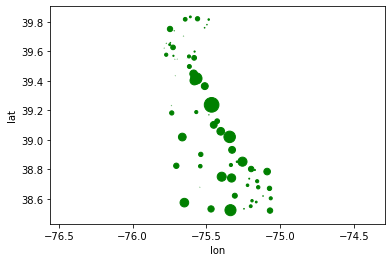

In [65]:
ax = natarea.plot.scatter("lon", "lat", color="green", s=natarea["ACRES"] / 100.)
ax.axis("equal") # set the aspect ratio of the axes to be equal

In [0]:
import folium

In [67]:
# -- create a map
mymap = folium.Map(location=[39.2, -75.5], zoom_start=8, width=500)

# -- add each Natural area to the map, one by one
ndata = len(natarea)
for ii in range(ndata):

  lat  = natarea["lat"].iloc[ii]
  lon  = natarea["lon"].iloc[ii]
  rad  = natarea["ACRES"].iloc[ii] / 5.
  name = natarea["NAME"].iloc[ii]

  circ = folium.Circle(location=[lat, lon], radius=rad, popup=name, fill=True, color="red")
  circ.add_to(mymap)

mymap